# Taller modelos lineales


# Parte 1 - Regresión lineal

Estimar una regresión con los datos de ingresos


## Previsión de ingresos

Vamos a trabajar con un conjunto de datos del censo de EE.UU. indome ([diccionario de datos](https://archive.ics.uci.edu/ml/datasets/Adult))

A muchas empresas les gustaría personalizar su oferta en función de los ingresos del cliente. Los clientes con ingresos elevados podrían, por ejemplo, estar expuestos a productos premium. Como los ingresos de un cliente no siempre se conocen explícitamente, el modelo predictivo podría estimar los ingresos de una persona basándose en otra información.

Nuestro objetivo es crear un modelo predictivo que sea capaz de dar una estimación de los ingresos de una persona.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [2]:
income.shape

(32561, 15)

## Ejercicio 4.1 

¿Cuál es la relación entre la edad y la renta?



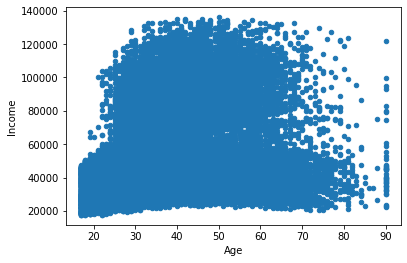

In [3]:
income.plot(x='Age', y='Income', kind='scatter')

Como se observa en el gráfico anterior,no hay una relación característica entre las variables Edad e ingreso, es por esto que se vé una nube de puntos sin forma o distribución alguna. 

## Ejercicio 4.2
Para un aumento del uno por ciento en la edad, ¿cuánto aumenta la renta?
Utilizando sklearn estime una regresión lineal y prediga los ingresos cuando la Edad es de 30 y 40 años.

In [4]:
mod1 = LinearRegression()
y = income['Income']
x = income[['Age']]
mod1.fit(x,y)

LinearRegression()

In [5]:
# Coeficientes del Modelo
# Intercepto
print("Intercepto",mod1.intercept_)
# Beta 1 estimado para la variable Edad
print("Beta 1 estimado",mod1.coef_)

Intercepto 32538.088130868626
Beta 1 estimado [542.16765707]


#### Modelo: 
Income = 32538.088 + 542.1676*Age
- Cuando la edad aumenta en un 1% el ingreso de la persona aumenta en 542 dólares.

In [6]:
Ingresos30 = 32538.088130868626 + 542.16765707*30
print("Cuando una persona posee 30 años sus ingresos estimados son de:",Ingresos30)
Ingresos40 = 32538.088130868626 + 542.16765707*40
print("Cuando una persona posee 40 años sus ingresos estimados son de:",Ingresos40)

Cuando una persona posee 30 años sus ingresos estimados son de: 48803.117842968626
Cuando una persona posee 40 años sus ingresos estimados son de: 54224.79441366863


EL ingresoq ue recibe una persona de 40 años es mayor al que recibe una persona de 30.


## Ejercicio 4.3

Ejecute un modelo de regresión utilizando como características la Edad y la Edad$^2$ utilizando las ecuaciones OLS. Prediga de nuevo los ingresos cuando la Edad es de 30 y 40 años, y compare con el modelo anterior.

In [7]:
income['Age2'] = income['Age'] ** 2
x = income[['Age','Age2']]
y = income['Income']
mod2 = LinearRegression()
mod2.fit(x,y)

LinearRegression()

In [ ]:
# Coeficientes del Modelo
# Intercepto
print("Intercepto",mod2.intercept_)
# Beta 1 y Beta 2 estimados para la variable Edad y Edad^2
print("Betas asociados a las variables",mod2.coef_)

Intercepto -16225.070974074282
Betas asociados a las variables [3131.77014151  -30.54341041]


#### Modelo
Income = -16225.07 + 3131.77 * Age - 30.54 *Age^2
- Cuando la edad aumenta en un 1% la variable Ingreso aumenta 3131 dólares; por otro lado el ingreso disminuye 30 dólares cuando el cuadrado de la edad aumenta en un 1%.

In [8]:
Ingresos230 = -16225.070974074282 +  3131.77014151*30  -30.54341041*30**2
print("Cuando una persona posee 30 años sus ingresos estimados son de:",Ingresos230)
Ingresos240 = -16225.070974074282 +  3131.77014151*40  -30.54341041*40**2
print("Cuando una persona posee 40 años sus ingresos estimados son de:",Ingresos240)

Cuando una persona posee 30 años sus ingresos estimados son de: 50238.96390222572
Cuando una persona posee 40 años sus ingresos estimados son de: 60176.27803032571


En comparación con el modelo en donde sólo se considera como variable explicativa a la Edad; el modelo considerando el cuadrado de la Edad estima ingresos más altos para las personas que están en los grupos de edades de 30 y 40 años.

## Ejercicio 4.4
Estime una regresión utilizando más características, diga cuáles y por qué las usó. Prediga de nuevo los ingresos cuando la Edad es de 30 y 40 años, y compare con el modelo anterior.


Con el fin de identificar qué otras variables pueden ser utilizadas como explicativas para la regresión se hará uso de la matriz de correlaciones.

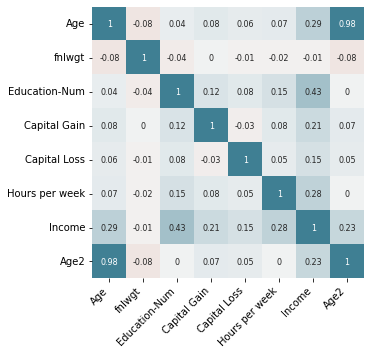

In [9]:
cor =pd.DataFrame(round(income.corr(),2))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    cor,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [10]:
xsex = pd.get_dummies(income[['Sex']]).drop(['Sex_Male'],axis=1) 

Con base en la matriz anterior se puede concluir que variables como Education-Num y Hours per week también pueden ser incluidas en el modelo ya que poseen una buena correlación con la variable objetivo (Ingreso) teniendo como punto de referencia correlaciones mayores al 25%. Por otro lado con el fin de "identificar" una brecha de género se puede incluir la variable sexo en la regresión. 

In [11]:
mod3 = LinearRegression()
x = income[['Age','Education-Num','Hours per week',]]
x = pd.concat([x, xsex], axis=1)
y = income['Income']
mod3.fit(x,y)


LinearRegression()

In [12]:
# Coeficientes del Modelo
# Intercepto
print("Intercepto",mod3.intercept_)
# Beta 1, Beta 2 y Beta 3 estimado para la variable Edad Education Num, Hours per week, hombre y mujer .
print("Betas asociados a las variables",mod3.coef_)

Intercepto -6511.607130527584
Betas asociados a las variables [   436.06237935   3955.24735797    249.91086352 -20659.13445055]


#### Modelo
Income = -6511.61 + 436.06*Age + 3955.25*'Education-Num' +249.91'Hours per week'  -20659.13*female
- Cuando la edad aumenta en un 1% el ingreso de las personas aumenta en 436 dólares manteniendo las demás variables como constantes. 
- Por otro aldo cuando la variable Education-Num aumenta en un 1% el ingreso aumenta en 3955 dólares. 
- Finalmente cuando el sexo de la persona es femenino el ingreso disminuye en 20659 dólares en comparación cuando es masculino.

In [13]:
print("Cuando las demás variables diferentes a Age toman valores de cero se tiene una estimación para el ingreso de:")
Ingresos330 = -6511.607130527584 + 436.06237935*30
print(Ingresos330, "para una persona de 30 años.")
Ingresos340 = -6511.607130527584 + 436.06237935*40
print(Ingresos340,"para una persona de 40 años.")

Cuando las demás variables diferentes a Age toman valores de cero se tiene una estimación para el ingreso de:
6570.264249972417 para una persona de 30 años.
10930.888043472416 para una persona de 40 años.


## Ejercicio 4.5

Utilizando las características seleccionadas en el punto anterior, parta la base en training (90%) y validación (10%). Posterior, con la bases de training (90%) aplique un modelo de regresión lineal usando K fold cross validation:
* K = 2
* K = 5
* K = 10

Calcule el MSE de test y el MSE de validación (10% restante) y compare los modelos.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
xsex = pd.get_dummies(income[['Sex']]).drop(['Sex_Male'], axis=1)
x = income[['Age','Education-Num','Hours per week',]]
x = pd.concat([x, xsex], axis=1)
y = income['Income']
mod451 = LinearRegression()
mod452 = LinearRegression()
mod453 = LinearRegression()

In [15]:
# Train-validation
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.1, random_state=123)

In [16]:
#K fold cross entrenamiento 
lrkf2 = KFold(n_splits=2, random_state=123, shuffle=True) # K=2
scores2 = cross_val_score(mod451, X_train, y_train,scoring='neg_mean_squared_error', cv=lrkf2, n_jobs=-1)

lrkf5 = KFold(n_splits=5, random_state=123, shuffle=True) # K=5
scores5 = cross_val_score(mod452, X_train, y_train,scoring='neg_mean_squared_error', cv=lrkf5, n_jobs=-1)

lrkf10 = KFold(n_splits=10, random_state=123, shuffle=True) # K=10
scores10 = cross_val_score(mod453, X_train, y_train, scoring='neg_mean_squared_error',cv=lrkf10, n_jobs=-1)
 
#MSE entrenamiento
print('MSE del entrenamiento k=2:', np.mean(abs(scores2)))
print('MSE del entrenamiento k = 5 :', np.mean(abs(scores5)))
print('MSE del entrenamiento k = 10:', np.mean(abs(scores10)))

MSE del entrenamiento k=2: 363168957.59625983
MSE del entrenamiento k = 5 : 363217836.75342876
MSE del entrenamiento k = 10: 363256783.878748


La diferencia entre el MSe cuando k=5 y k=2 es muy pequeña; sin embargo nos quedaremos con el mejor modelo, es decir con el que minimice el MSE que para este caso es utilizando 2 grupos(k=2). 

In [17]:
# Grupo de validación.
from sklearn.metrics import mean_squared_error
mod452.fit(X_train, y_train)
y_predict = mod452.predict(X_validation)
print('MSE validación:', mean_squared_error(y_validation, y_predict))

MSE validación: 360853253.3476765


Como se puede evidenciar el error cuadrático medio en el grupo de validación es menor en comparación con el grupo del training y test. Esto nos indica que el modelo ajustado funciona adecuadamente para hacer la predicción de Income teniendo como variables explicativas Age, Sex, Education-Num y Hours per week.

#Parte 2: Regresión Logística

### Customer Churn: 
La pérdida/abandono de los clientes de la empresa. Especialmente, las industrias que la adquisición de usuarios es costosa, es de crucial importancia para una empresa para reducir e idealmente hacer que la rotación de clientes a 0 para mantener sus ingresos recurrentes. Si se considera que la retención de clientes es siempre más barata que la adquisición de clientes y generalmente depende de los datos del usuario (uso del servicio o producto), plantea un gran/excitante/difícil problema para el aprendizaje automático.

### Datos
El conjunto de datos procede de un proveedor de servicios de telecomunicaciones en el que se recoge el uso del servicio (plan internacional, plan de buzón de voz, uso diurno, uso nocturno, etc.) y la información demográfica básica (estado y código de área) del usuario. En el caso de las etiquetas, tengo un único punto de datos que indica si el cliente ha sido dado de baja o no.


In [18]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [19]:
data.head(n=10)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


# Ejercicio 4.6

¿Cuál es la distribución de los churners? Haga la transformación correspondiente para predecir Churn. (0-FAlse, 1-True)



In [20]:
for col in data.columns:
    num_missing = data[col].isnull().sum()
    pct_missing = np.mean(data[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

State - 0.0% - 0
Account Length - 0.0% - 0
Area Code - 0.0% - 0
Phone - 0.0% - 0
Int'l Plan - 0.0% - 0
VMail Plan - 0.0% - 0
VMail Message - 0.0% - 0
Day Mins - 0.0% - 0
Day Calls - 0.0% - 0
Day Charge - 0.0% - 0
Eve Mins - 0.0% - 0
Eve Calls - 0.0% - 0
Eve Charge - 0.0% - 0
Night Mins - 0.0% - 0
Night Calls - 0.0% - 0
Night Charge - 0.0% - 0
Intl Mins - 0.0% - 0
Intl Calls - 0.0% - 0
Intl Charge - 0.0% - 0
CustServ Calls - 0.0% - 0
Churn? - 0.0% - 0


En la base de datos no presenta valores faltantes en ninguna de sus variables.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note lin

(array([2850.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         483.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

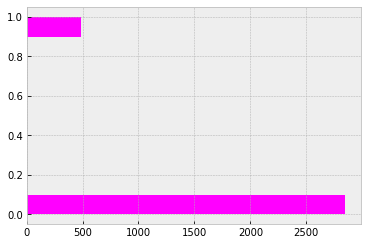

In [ ]:
!pip install dfply
import dfply as dfp
plt.style.use('bmh')
data['Churn'] = data['Churn?'].map({'False.':0, 'True.':1}).astype(np.int)
data["Int'l Plan"] = data["Int'l Plan"].map({'no':0, 'yes':1}).astype(np.int)
data["VMail Plan"] = data["VMail Plan"].map({'no':0, 'yes':1}).astype(np.int)
plt.hist(data['Churn'], color ='MAGENTA', orientation = 'horizontal')

Como se evidencia en el gráfico anterior, la variable Churn solo puede tomar valores de "1" y "0", donde "1" indica si el cliente ha sido de baja y "0" si el cliente no ha sido de baja. Por ende, la distribucción de la variable Churn es una Bernoulli puesto que representa una familia de distribuciones de probabilidad discreta que solo puede tomar valores de 0 y 1.

Text(0, 0.5, 'Churn')

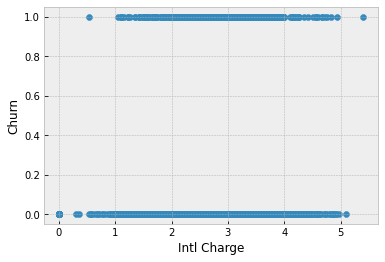

In [ ]:
plt.scatter(data['Intl Charge'], data['Churn'])
plt.xlabel('Intl Charge')
plt.ylabel('Churn')

Dado que la distribucción de Churn en una bernoulli y si al graficarla con la variable Intl Charge, se observa, la relación entre la variable dependiente (cualitativa dicotómica), y la covariable (continua en este caso), no queda definida por una recta (lo que correspondería un modelo lineal), sino que describe una forma sigmoidea (distribución logística).

# Ejercicio 4.7
Entrene una Regresión Logística creando Y y X con la información en IntlCharge.


In [ ]:
from sklearn.linear_model import LogisticRegression
mod2 = LogisticRegression()
X = data['Intl Charge']
X = pd.DataFrame(X)
y = data['Churn']
mod2.fit(X, y)

LogisticRegression()

# Ejercicio 4.8

¿Cuáles son los coeficientes de la regresión logística? Interpretelos para un valor de IntlCharge = 1.




In [ ]:
mod2.coef_

array([[0.26154394]])

In [ ]:
mod2.intercept_

array([-2.51175961])

$$\log (cliente\ dado \ de \ baja) = -2.5117 +(0.261543* \ intelCharge = 1)$$

Para un valor de "intelCharge" de 0, el logaritmo de las posibilidades de "Churn" es de -2.5117. Asimismo, puesto que el coeficiente de "IntelCharge es positivo y es significativo se puede afirmar que a mayor intlCharge mayor es la probabilidad de que el  cliente haya sido dado de baja.

# Ejercicio 4.9

Seleccione 3 variables independientes para entrenar una regresión logística. Interprete cada uno de los valores de los coeficientes en función de la variable churn.


## Visualización de datos

In [ ]:
from ast import increment_lineno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
tab = data['Churn']
tab2 = data['CustServ Calls']
px.box( data ,  tab,  tab2) 

In [ ]:
pd.crosstab(data['Churn'], data['VMail Plan'], normalize = 'index')

VMail Plan,0,1
Churn,,
0,0.704561,0.295439
1,0.834369,0.165631


In [ ]:
pd.crosstab(data['Churn'], data["Int'l Plan"], normalize = 'index')

Int'l Plan,0,1
Churn,,
0,0.934737,0.065263
1,0.716356,0.283644


Para escoger las variables explicativas se analizaron cada uno de las variables en función de la variable respuesta "Churn" para saber cual de ellas eran más significativas para dicha variable, donde, para las variables categoricás se utilizó tablas de contigencia y para las variables continuas boxplot. Las variables explicativas para entrenar el modelo de regresión logistica son:


*   "CustServ Calls" que indica cuantas veces llamo la persona a atención al cliente.
*   "VMail Plan" que indica si el cliente cuenta con plan de correo virtual o no.
*   "Int'l Plan" que indica si el cliente cuenta con plan intercional o no.






In [ ]:
mod = LogisticRegression(fit_intercept = True)
X1 = data[["Int'l Plan","VMail Plan", "CustServ Calls"]]
X1 = pd.DataFrame(X1)
y1 = data['Churn']
mod.fit(X1, y1)

LogisticRegression()

In [ ]:
mod.coef_

array([[ 1.91098799, -0.81792038,  0.44133477]])

In [ ]:
mod.intercept_

array([-2.68408922])

$$\log (cliente\ dado \ de \ baja) = -2.684089 +0.261543\ Int'l_Plan   -081792038  \ VMail_Plan + 0.44133477 \ CustServ_Calls $$

Si las variables explicativas "Intplan", "VMailplan" y "CustServcalls" son iguales a 0 el el logaritmo de las posibilidades de "Churn" es de -2,68 unidades .Por otro lado, al aumentar una unidad a "Int'plan" aumenta a las las probabilidades logarítmicas de "Churn" un 0.4615 unidades, es decir, que al tener el cliente un plan internacional es más probable de que el cliente haya sido de baja. Por lo contratio, la variable "VMailplan" al aumentar en una unidad disminuye la probabilidad logaritmicas de "Churn", dicho de otra manera, si el cliente cuenta con plan de correo virtual disminuye la probabilidad logaritmica de que vaya a ser dado de baja y la variable "CustSercalls" al aumentar en una unidad aumenta la probabilidad logaritmica de la variable "Churn" en un 0.4413 unidades.


## Ejercicio 4.10

Utilizando las 3 variables independientes del punto anterior, particione la base en training (90%) y validación (10%). Posterior, con la bases de training (90%) aplique un modelo de regresión logística usando K fold cross validation:
* K = 2
* K = 5
* K = 10

Calcule la precisión de test y la precisión de validación(10% restante) y compare los modelos.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
feature_cols = ["Int'l Plan","VMail Plan",'CustServ Calls']
X = data[feature_cols]
y = data['Churn']
mod1 = LogisticRegression(fit_intercept = True)
mod5 = LogisticRegression(fit_intercept = True)
mod10 = LogisticRegression(fit_intercept = True)

# Train-validation
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=123)

#K fold cross entrenamiento k=2
cv = KFold(n_splits=2, random_state=123, shuffle=True)
scores = cross_val_score(mod1, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)# le paso mi modelo, mis x y y, toca meter que parametro quiero usar con el scoring 

#K fold cross entrenamiento k=5
cv1 = KFold(n_splits=5, random_state=123, shuffle=True)
scores1 = cross_val_score(mod5, X_train, y_train, scoring='precision', cv=cv1, n_jobs=-1)# le paso mi modelo, mis x y y, toca meter que parametro quiero usar con el scoring 
 
#K fold cross entrenamiento k=10
cv2 = KFold(n_splits=10, random_state=123, shuffle=True)
scores2 = cross_val_score(mod10, X_train, y_train, scoring='precision', cv=cv2, n_jobs=-1)# le paso mi modelo, mis x y y, toca meter que parametro quiero usar con el scoring 
 
#Precisión entrenamiento
print('Precisión del entrenamiento k=2:', np.mean(abs(scores)))
print('Precisión del entrenamiento k = 5 :', np.mean(abs(scores1)))
print('Precisión del entrenamiento k = 10:', np.mean(abs(scores2)))

Precisión del entrenamiento k=2: 0.4983314794215795
Precisión del entrenamiento k = 5 : 0.45581932773109246
Precisión del entrenamiento k = 10: 0.485551948051948


Según la precisión que responde a la pregunta: ¿qué proporción de los positivos predichos es realmente positiva?, nos quedamos con el k = 2 puesto que es el modelo que presenta una precisión mayor.

In [ ]:
from sklearn import metrics
mod2.fit(X_train, y_train)
y_predict = mod2.predict(X_validation)
print('Precisión validación:', metrics.precision_score(y_validation, y_predict))

Precisión validación: 0.5833333333333334


La precisión de la validación nos indica que el 58.33% de los positivos predichos son realmente positivos y si la comparamos con la precisión del entrenamiento la cual fue del 49,83% podemos concluir que el modelo propuesto se adapta de buena manera a la predicción de la variable "Churn" datos los datos no observados de las variables xplicativas ""CustServ Calls","VMail Plan" y "Int'l Plan".